# Lab 7 - Performance Metrics for Classification Problems

### 1. Introduction:
In this report I am going to use ML model to classifiy the MNIST dataset and evaluate all model with 5 different metrics

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

### 2. Data Exploration:
Load MNIST dataset

In [414]:
mnist = fetch_openml('mnist_784', as_frame=True, parser='auto')
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [415]:
display(mnist.target.head())

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Random inspection data

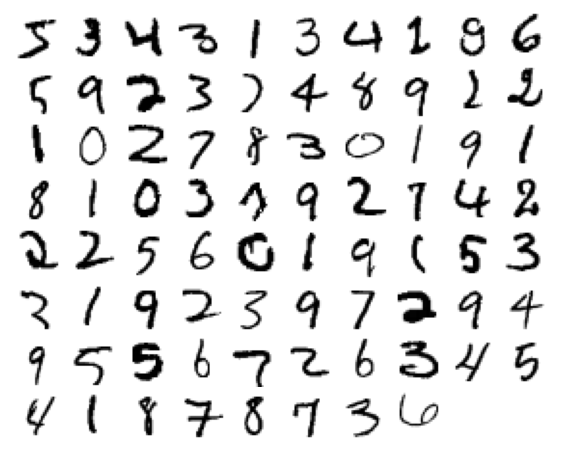

In [416]:
plt.figure(figsize=(7, 7))
for index, digital in enumerate(mnist.data.to_numpy()[:777:10]):
    plt.subplot(10, 10, index + 1)
    image = digital.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Display images of number 7

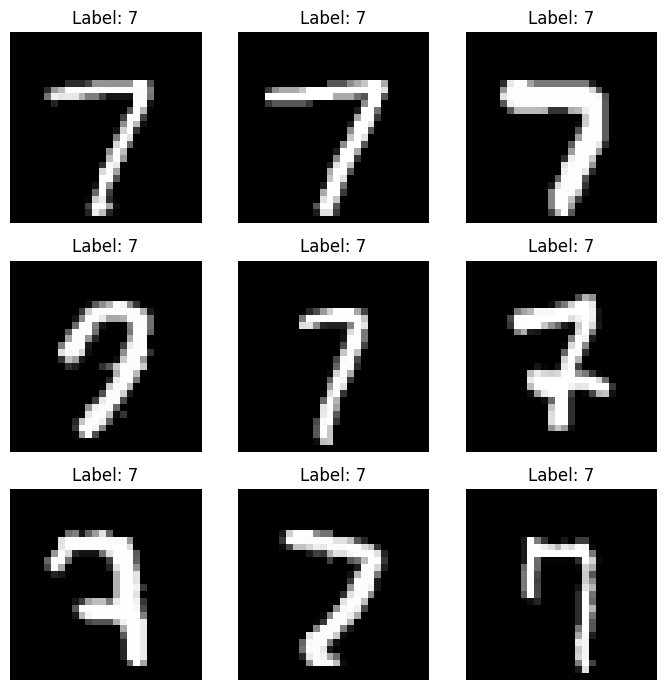

In [417]:
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    class_indices = np.where(mnist.target == '7')[0]
    random_index = np.random.choice(class_indices)
    plt.imshow(mnist.data.iloc[random_index].to_numpy().reshape(28, 28), cmap='gray')

    plt.title(f"Label: {mnist.target[random_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Display images of number 3

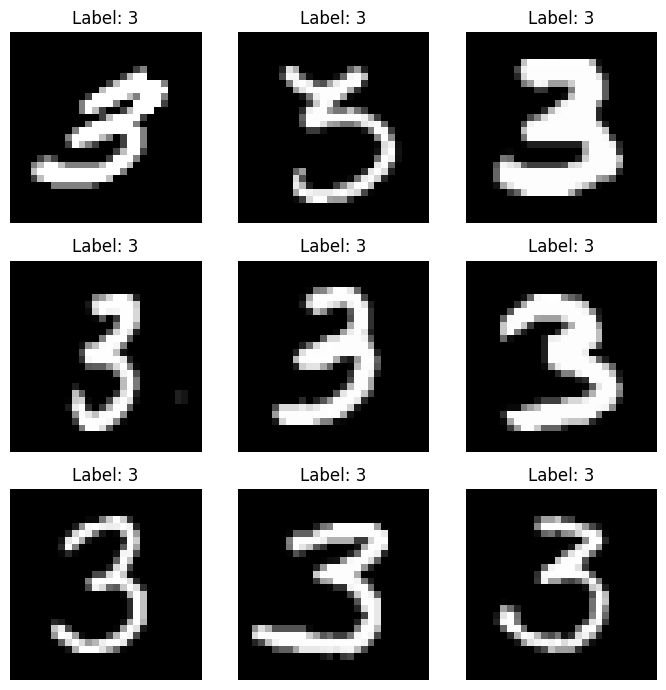

In [418]:
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    class_indices = np.where(mnist.target == '3')[0]
    random_index = np.random.choice(class_indices)
    plt.imshow(mnist.data.iloc[random_index].to_numpy().reshape(28, 28), cmap='gray')

    plt.title(f"Label: {mnist.target[random_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

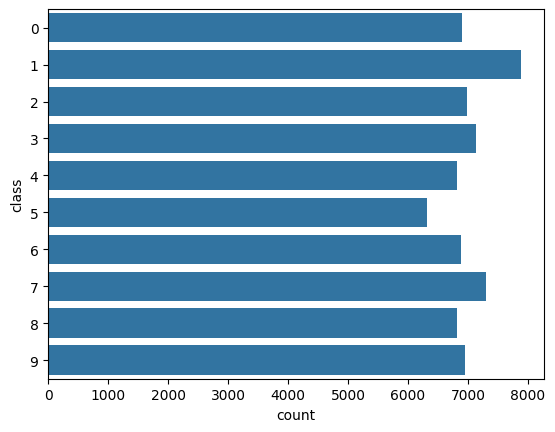

In [419]:
sns.countplot(mnist.target)
plt.show()

Data Cleaning

In [420]:
mnist.data.isna().any().any() and mnist.data.isnull().any()

False

In [421]:
mnist.target.isna().any and mnist.target.isnull().any()

False

### 3. Data Preprocessing: The preprocessing of the data, to make it suitable for the model.

Convert data to numpy

In [422]:
x = mnist.data.to_numpy()
y = mnist.target.to_numpy()

Data Normalization, Convert label to int

In [423]:
x = x / 255.0
y = y.astype(int)

Split the dataset to train, validation and test, by 80% 10% and 10% respectively.

In [424]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=True, random_state=42)

### 4. Modeling
**Use MLP for classifiying the MNIST Dataset**

refe from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

In [425]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)
mlp.fit(x_train, y_train)

Iteration 1, loss = 0.29731810
Iteration 2, loss = 0.14604766
Iteration 3, loss = 0.11754696
Iteration 4, loss = 0.10070470
Iteration 5, loss = 0.09092714
Iteration 6, loss = 0.08210812
Iteration 7, loss = 0.07659665
Iteration 8, loss = 0.07096091


MLPClassifier(hidden_layer_sizes=(40,), learning_rate_init=0.2, max_iter=8,
              random_state=1, solver='sgd', verbose=10)

### 5. Evaluation

**Accuracy**

In [426]:
print('validation set score: %f' % mlp.score(x_val, y_val))

validation set score: 0.962143


**Confusion Metric**

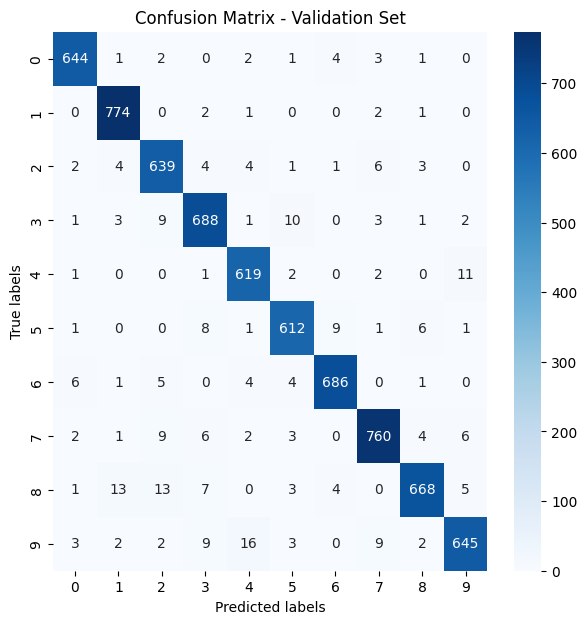

In [427]:
y_val_pred = mlp.predict(x_val)
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

**Precision recall and F1 for each class**

In [428]:
print("Classification Report - Validation Set:")
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

Classification Report - Validation Set:


,precision,recall,f1-score,support
0,0.974281,0.978723,0.976497,658.000000
1,0.968711,0.992308,0.980367,780.000000
2,0.941090,0.962349,0.951601,664.000000
3,0.948966,0.958217,0.953569,718.000000
4,0.952308,0.973270,0.962675,636.000000
5,0.957746,0.957746,0.957746,639.000000
6,0.974432,0.970297,0.972360,707.000000
7,0.966921,0.958386,0.962635,793.000000
8,0.972344,0.935574,0.953605,714.000000
9,0.962687,0.933430,0.947832,691.000000


**Plot the precision-recall curve**

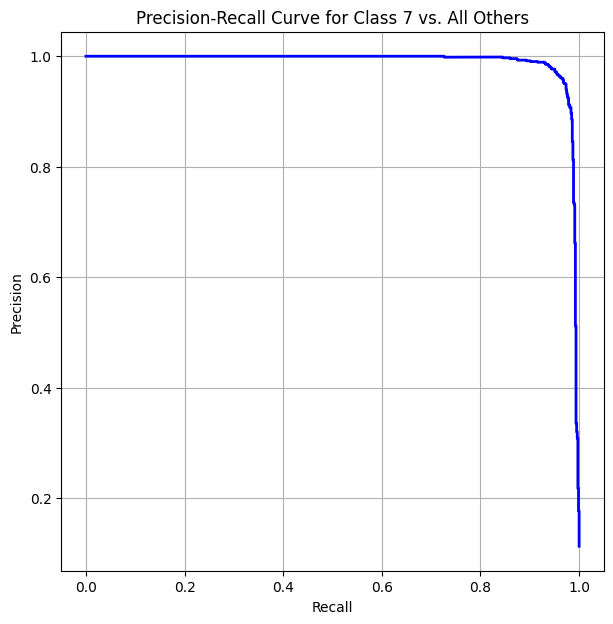

In [429]:
y_val_binary = (y_val == 7).astype(int)

precision, recall, thresholds = precision_recall_curve(y_val_binary, mlp.predict_proba(x_val)[:, 7])

plt.figure(figsize=(7, 7))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class 7 vs. All Others')
plt.grid(True)
plt.show()

**Q: Assume that you want to increase precision for your chosen class without retraining the model - what will you do? provide a numeric example. And same question, but for increasing recall.** <br/> <br/>
A: To increase precision without retraining, I can raise the decision threshold. However, raising the threshold will also result in a lower recall.
To increase recall, I can reduce the threshold instead of retraining the model. Needless to say, reducing threshold will decrease the precision.

### 6. Conclusions

Test set Accuracy: 0.964714
Test set Precision: 0.964857
Test set F1-Score: 0.964355
Test set Recall: 0.964140
Classification Report - Test Set:


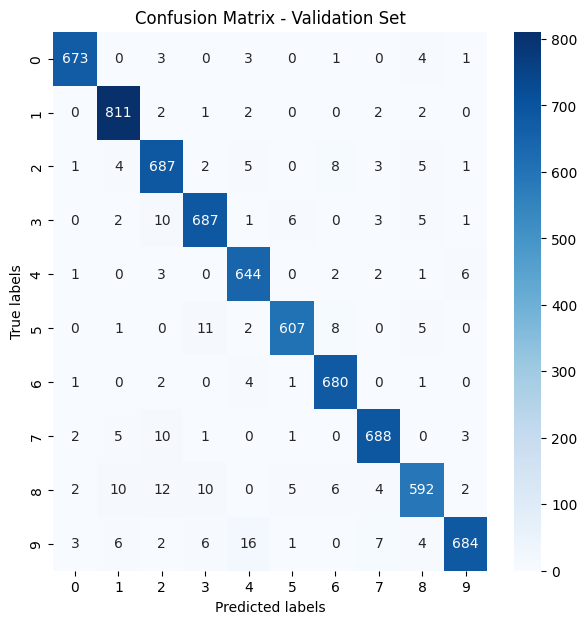

In [512]:
y_test_pred = mlp.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print('Test set Accuracy: %f' % accuracy)

# Precision
precision = precision_score(y_test, y_test_pred, average='macro')
print('Test set Precision: %f' % precision)

# F1-Score
f1 = f1_score(y_test, y_test_pred, average='macro')
print('Test set F1-Score: %f' % f1)

# Recall
recall = recall_score(y_test, y_test_pred, average='macro')
print('Test set Recall: %f' % recall)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Classification Report - Test Set:")

plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

**Based on the following table** <br/>
|  Accuracy | Precision | F1-Score | Recall   |
|-----------|-----------|----------|----------|
| 96.4714%  | 96.4857%  | 96.4355% | 96.4140% |

The model show all metrics score up to 96%
